#### Imports


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score


### Lectura de dades


In [51]:
import pandas as pd

a2text = pd.read_csv('data/A2-synthetic.txt')

display(a2text)

,x1,x2,x3,x4,class
0,-0.031676,-9.912054,-0.579436,-1.044239,1
1,0.002526,6.172456,3.288339,-1.006427,5
2,0.183123,-0.387841,6.236470,-1.691491,2
3,-0.042262,-1.996272,-1.655302,-2.995311,1
4,-0.062811,-0.417072,6.657475,-3.633134,4
...,...,...,...,...,...
355,-0.340733,8.504536,7.903644,-2.032197,6
356,-0.024928,1.551977,6.361992,-0.757714,2
357,-0.668529,-0.607597,0.639295,4.329213,6
358,-0.122711,-5.516957,-2.111173,2.209675,3


### PreProcessament


In [52]:
import pandas as pd

import seaborn as sns

a2real = pd.read_csv('data/A2-real.txt', sep=';')
a2text = pd.read_csv('data/A2-synthetic.txt')

display(a2real)
display(a2text)
# Separate features and labels
# Preparación de datos
X_real = a2real.drop(columns=['Class', 'Location'])
X = a2text.drop(columns=['class'])
y_real = a2real['Class']
y = a2text['class']
z = a2real['Location']

display(y)


,BL,BD,FL,BM,S,Location,Class
0,34.5,18.1,187,2900,1,L2,C1
1,38.8,20.0,190,3950,0,L3,C1
2,45.1,14.5,207,5050,1,L2,C2
3,34.6,21.1,198,4400,0,L1,C1
4,40.6,19.0,199,4000,0,L1,C1
...,...,...,...,...,...,...,...
328,45.0,15.4,220,5050,0,L2,C2
329,43.8,13.9,208,4300,1,L2,C2
330,49.6,16.0,225,5700,0,L2,C2
331,51.5,16.3,230,5500,0,L2,C2


,x1,x2,x3,x4,class
0,-0.031676,-9.912054,-0.579436,-1.044239,1
1,0.002526,6.172456,3.288339,-1.006427,5
2,0.183123,-0.387841,6.236470,-1.691491,2
3,-0.042262,-1.996272,-1.655302,-2.995311,1
4,-0.062811,-0.417072,6.657475,-3.633134,4
...,...,...,...,...,...
355,-0.340733,8.504536,7.903644,-2.032197,6
356,-0.024928,1.551977,6.361992,-0.757714,2
357,-0.668529,-0.607597,0.639295,4.329213,6
358,-0.122711,-5.516957,-2.111173,2.209675,3


0      1
1      5
2      2
3      1
4      4
      ..
355    6
356    2
357    6
358    3
359    6
Name: class, Length: 360, dtype: int64

### PCA


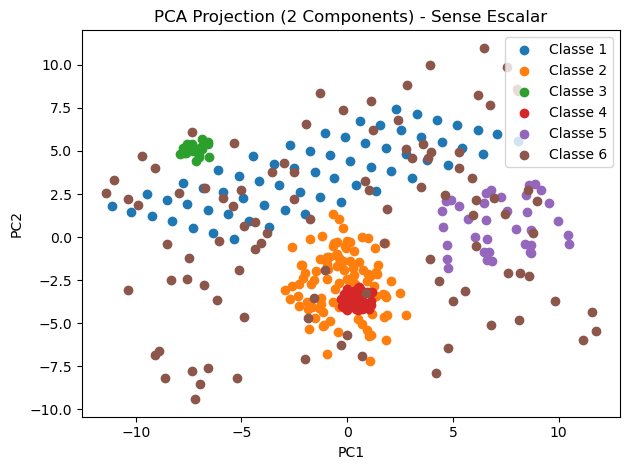

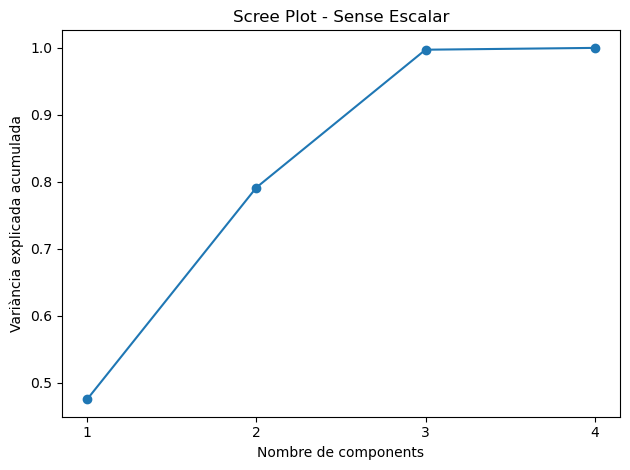

In [53]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# PCA amb les dades originals (sense escalar)
pca2 = PCA(n_components=2)
X_pca = pca2.fit_transform(X)

# Projecció en dues dimensions
plt.figure()
for cls in np.unique(y):
    mask = (y == cls)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f'Classe {cls}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection (2 Components) - Sense Escalar')
plt.legend()
plt.tight_layout()
plt.show()

# Scree plot (variància acumulada)
pca_full = PCA().fit(X)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure()
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o')
plt.xlabel('Nombre de components')
plt.ylabel('Variància explicada acumulada')
plt.title('Scree Plot - Sense Escalar')
plt.xticks(range(1, len(cum_var)+1))
plt.tight_layout()
plt.show()


#### Comentaris sobre pca

En primer lloc, veiem que la classe 3 i la classe 4 estan molt ben distinguides i concentrades. La classe 2 també està delimitada encara és més llarga i ample aixi com la classe 5. La classe 5 encara que és molt diferent en relació al PCA1, està també delimitada, no obstant la ultima classe(6), sembla ser la classe més heterogenea sense tenir cap zona clara, és molt variant en els dos principals components.

Podem observar que hi ha molta variança entre la classe 3 i la classe 5, i suficient entre la 3 i el conjunt (2 i 4).
Hi ha molta similirat entre la classe 3 i parts de la classe 5 i 6.

El scree plot ens diu que a partir de la tercera dimensió ja trobem una variança entre components de casi 1, mentre que en el primer plot només obtenim 0.8.




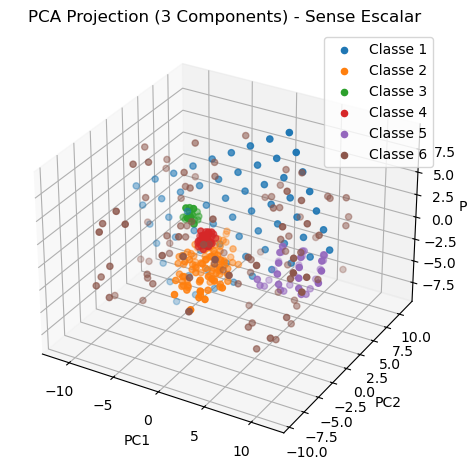

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

# PCA amb les dades originals (sense escalar), amb 3 components
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X)

# Projecció en tres dimensions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for cls in np.unique(y):
    mask = (y == cls)
    ax.scatter(X_pca3[mask, 0], X_pca3[mask, 1], X_pca3[mask, 2], label=f'Classe {cls}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA Projection (3 Components) - Sense Escalar')
plt.legend()
plt.tight_layout()
plt.show()



Per curiositat, hem fet el PCA amb tres components, tot i tenir millor variança és dificil extreure informació rellevant o diferent. Els unics detalls trobats son: La classe 4 sembla ser més diferent que la classe 2 i la classe 6 continua sent bastant heterogenea.

### t-SNE


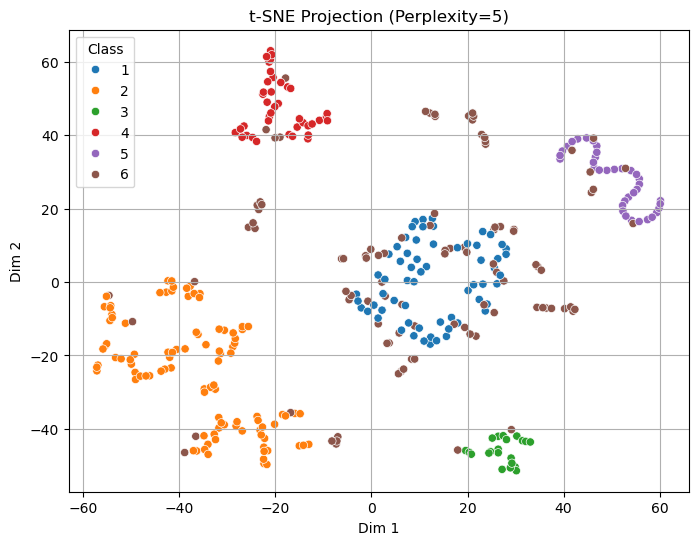

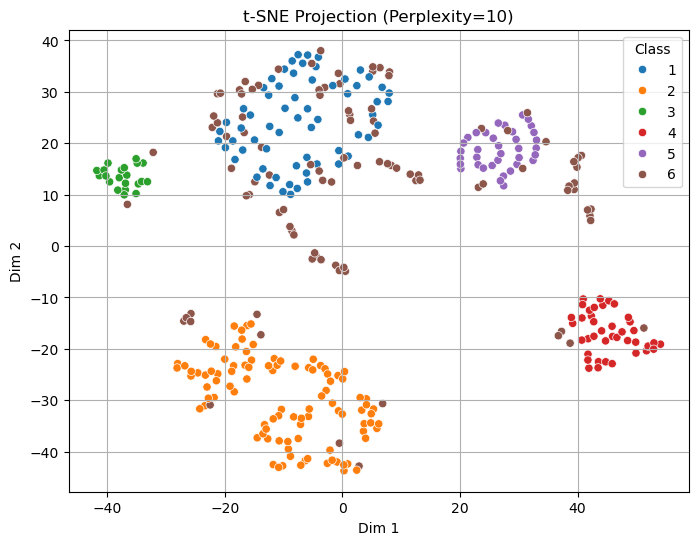

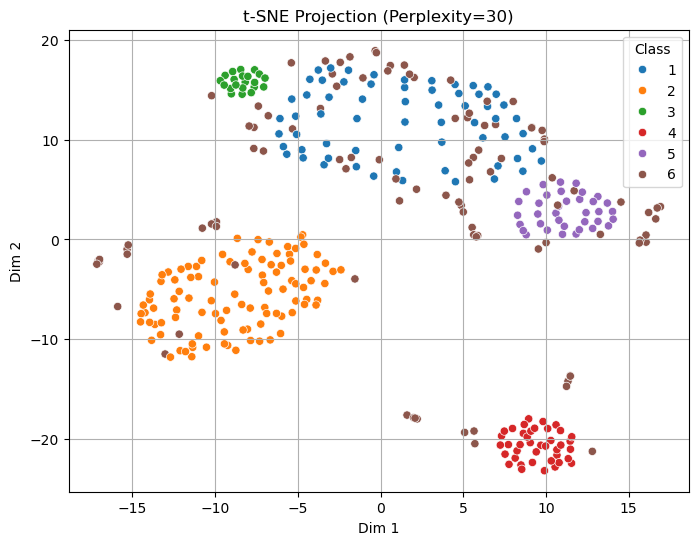

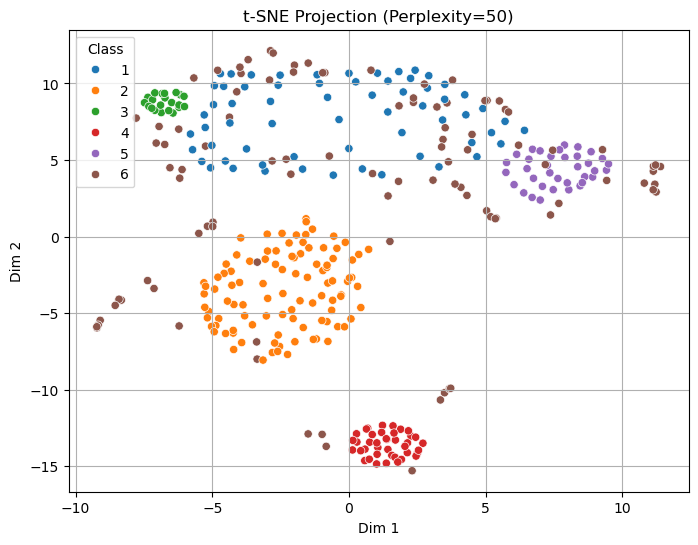

In [55]:
for perplexity in [5, 10, 30, 50 ]:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
    X_tsne = tsne.fit_transform(X)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='tab10')
    plt.title(f't-SNE Projection (Perplexity={perplexity})')
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')
    plt.legend(title='Class')
    plt.grid(True)
    plt.show()


#### Comentaris sobre t-SNE

A mesura que augmentem la perplexity, els punts de la mateixa classe s'atreuen més tot i que els punts de diferents classes continuen igual de separats(logaristicament). Pel parametre perplexity, trobo que la millor reprentació, la més clara és amb perplexity = 10. És veu clarament els 5 diferents clusters i després la última classe repartida entre la classe 1 i 5. Amb t-SNE s'observa millor que la classe 6, conté en la seva gran majoria registres de la classe 5.


### k-means Clustering

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

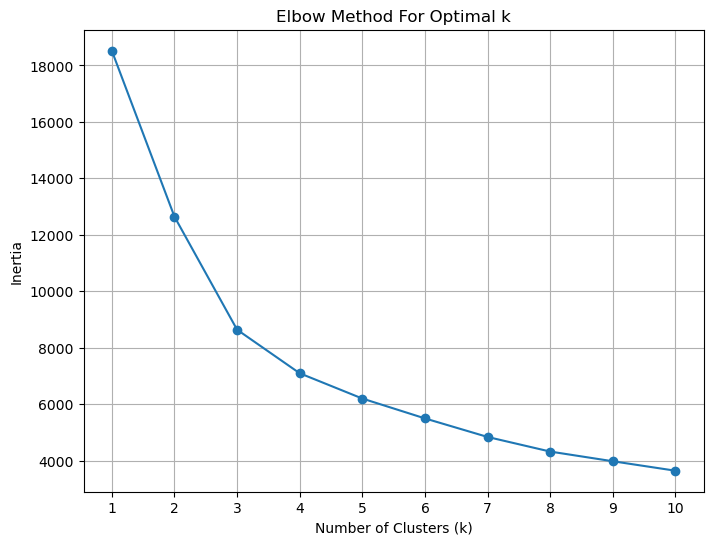

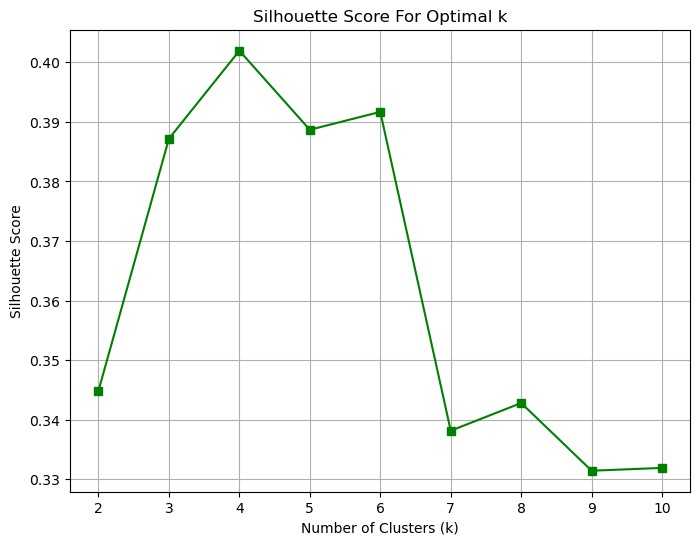

Best k based on Silhouette Score: 4


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


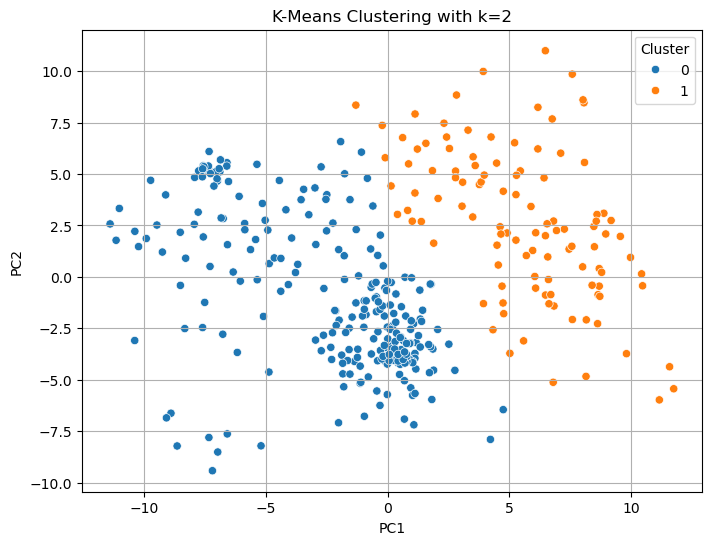

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


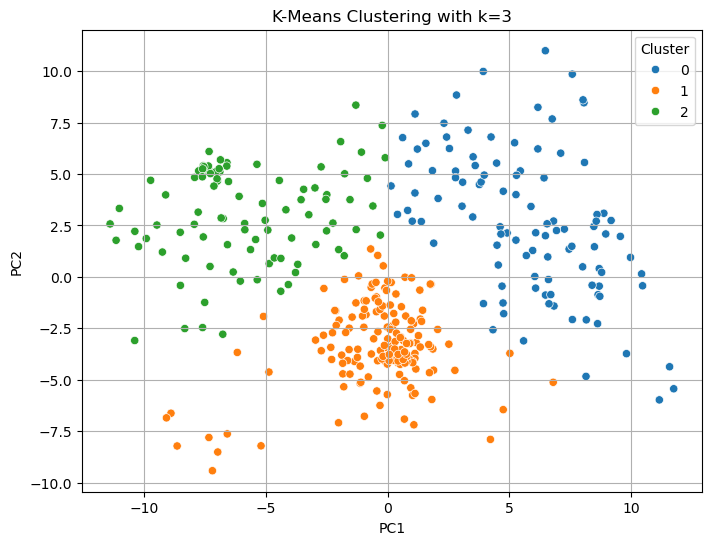

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


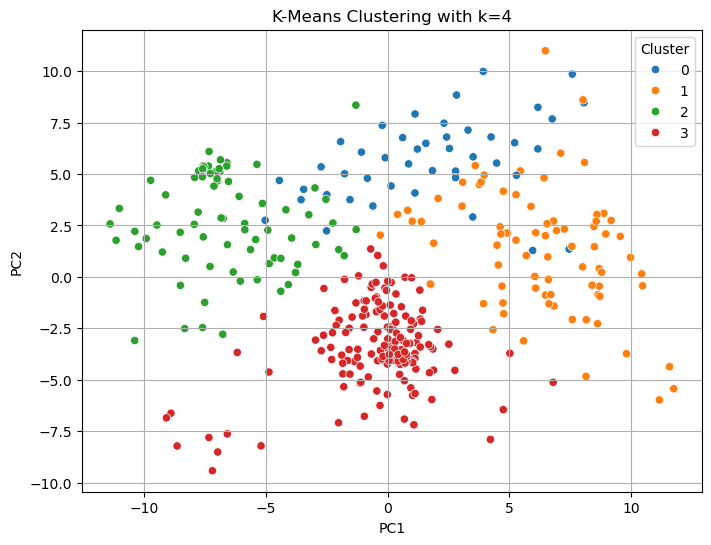

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


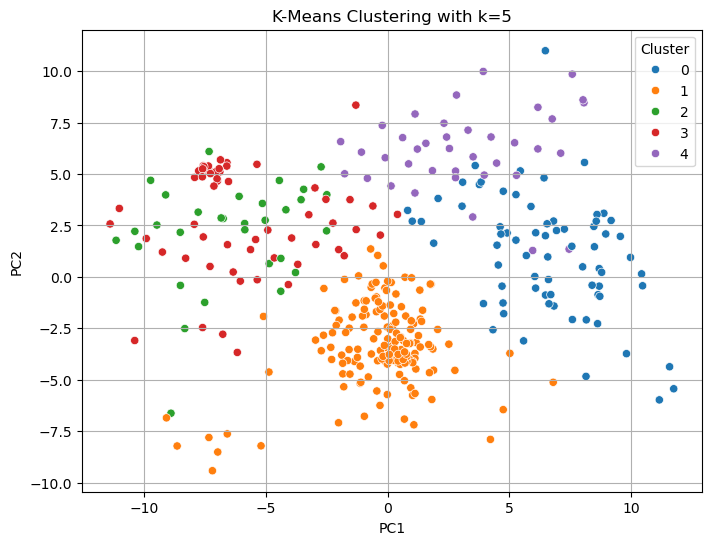

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


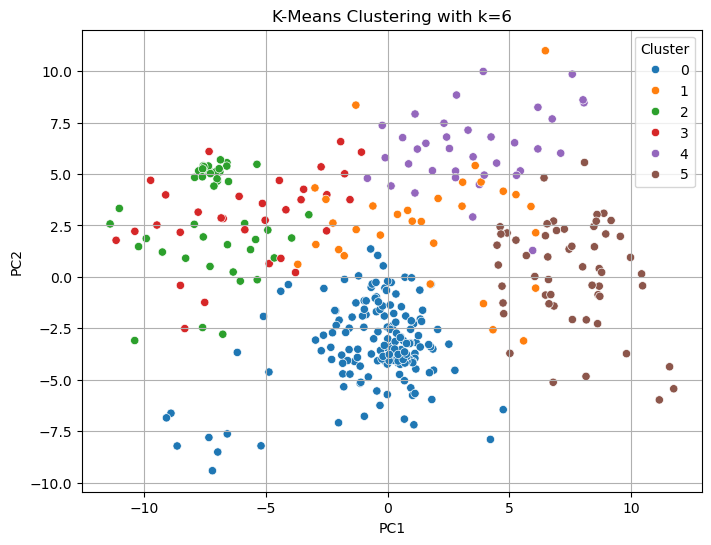

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Assuming X, X_pca, and y are already defined
K = len(np.unique(y))

# Step 1: Elbow and Silhouette Scores
inertias = []
silhouette_scores = []

k_values = range(1, K + 5)  # Start from k=1 for Elbow method

# Elbow method (inertia)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Silhouette scores (start from k=2)
silhouette_k_values = range(2, K + 5)
for k in silhouette_k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.xticks(k_values)
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(silhouette_k_values, silhouette_scores, marker='s', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.grid(True)
plt.xticks(silhouette_k_values)
plt.show()

# Best silhouette score
best_k = silhouette_k_values[np.argmax(silhouette_scores)]
print(f'Best k based on Silhouette Score: {best_k}')

# Step 2: Clustering and ARI analysis
for k in range(2, K + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(X)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='tab10')
    plt.title(f'K-Means Clustering with k={k}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()


### Comentaris sobre k-means

S'ha utlitzat 3 mesures per trobar quina és la millor k, el "punt de colze", la silueta i la representació grafica.

El elbow plot ens indica que la millor k és el 3, ja que és on trobem el elbow point. La representació grafica sembla indicarnos que la millor segmentació és també a k = 3. D'altra banda, al realitzar la silueta, trobem que la millor puntuació la trobem al k = 5, aquesta mesura pot ser recolzada visualment amb la representació gràfica.

Considerant les altres mesures anteriors com el PCA i el t-SNE, ens decantariem per k = 5,  ja que concorda completament amb les conclusions anteriors. Tot i això, tenir només 3 clusters també sembla una bona idea.


## AHC (CLUSTERING JERARQUICO AGLOMERATIO)

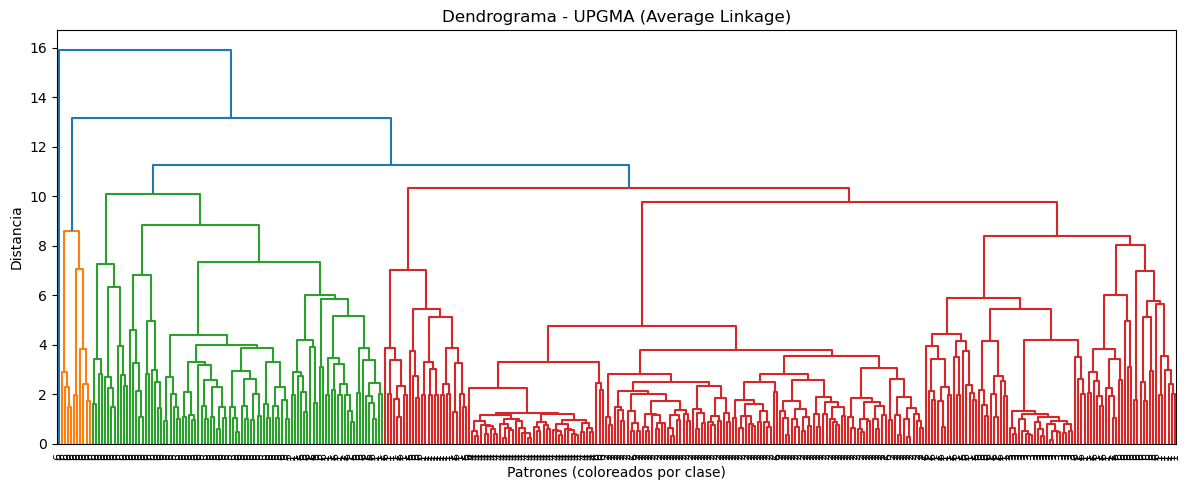

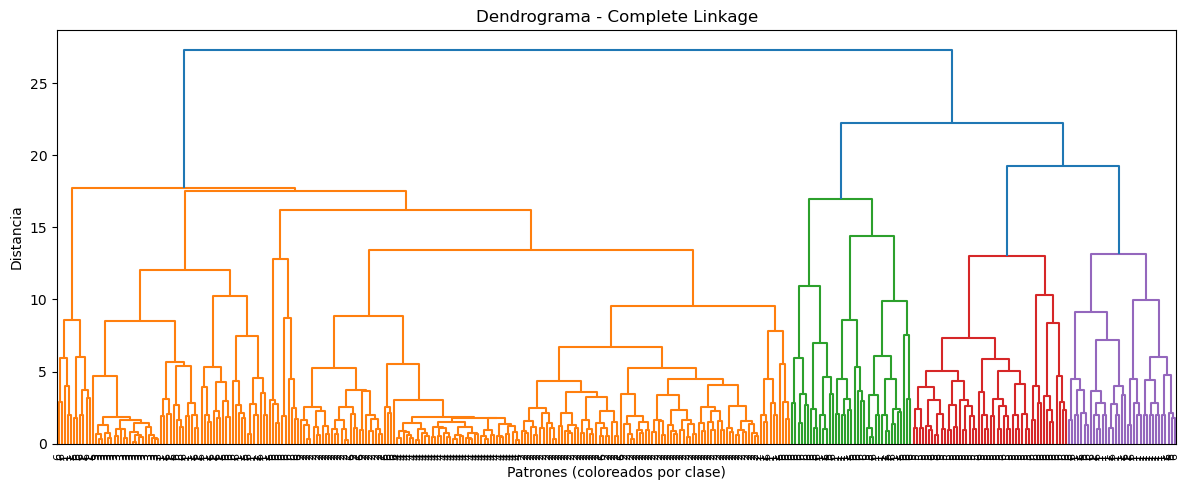

In [57]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Clustering jerárquico: average linkage (UPGMA)
linkage_avg = linkage(X, method='average')

# Clustering jerárquico: complete linkage
linkage_complete = linkage(X, method='complete')

# Dendrograma - UPGMA
plt.figure(figsize=(12, 5))
plt.title("Dendrograma - UPGMA (Average Linkage)")
dendrogram(linkage_avg, labels=y.values, leaf_rotation=90, leaf_font_size=8)
plt.xlabel("Patrones (coloreados por clase)")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()

# Dendrograma - Complete Linkage
plt.figure(figsize=(12, 5))
plt.title("Dendrograma - Complete Linkage")
dendrogram(linkage_complete, labels=y.values, leaf_rotation=90, leaf_font_size=8)
plt.xlabel("Patrones (coloreados por clase)")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()


### Comentarios AHC

Los dendrogramas generados mediante agrupamiento jerárquico aglomerativo, usando los métodos UPGMA (average linkage) y complete linkage, muestran cómo los patrones del conjunto A2-synthetic.txt pueden agruparse sin conocimiento previo de sus clases. Como el aprendizaje se realiza sin supervisión, las estructuras obtenidas reflejan la capacidad de cada técnica para descubrir relaciones naturales en los datos.

El método UPGMA revela agrupaciones jerárquicas claras que se forman a distancias relativamente bajas, lo que indica la presencia de clústeres bien definidos. Muchas de estas agrupaciones coinciden visualmente con clases homogéneas, lo que sugiere que este enfoque ha captado de forma aproximada la organización real del conjunto. Complete linkage, en cambio, produce un dendrograma más compacto, donde los clústeres se forman solo cuando todos los elementos están muy próximos. Esto mejora la resistencia a outliers, aunque puede dificultar la detección de grupos más dispersos.

Ambos métodos permiten identificar entre 6 y 8 clústeres principales al cortar el dendrograma a una altura adecuada, lo cual se alinea con el número real de clases del conjunto. En conjunto, UPGMA destaca por su claridad visual y capacidad de agrupación temprana, mientras que complete linkage aporta mayor rigor en la definición de clústeres. La comparación entre ambos ofrece una visión complementaria útil para el análisis exploratorio en aprendizaje no supervisado.

## Autoencoder

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


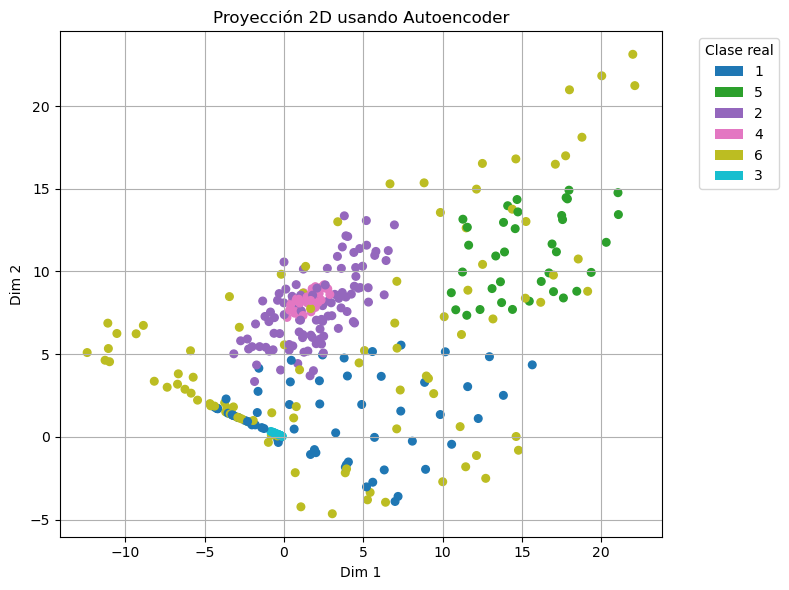

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import pandas as pd

# Definir arquitectura del Autoencoder
input_dim = X.shape[1]  # 4 características
encoding_dim = 2        # Queremos proyectar a 2D

input_layer = Input(shape=(input_dim,))
encoded = Dense(8, activation='relu')(input_layer)
bottleneck = Dense(encoding_dim, activation='linear', name='bottleneck')(encoded)
decoded = Dense(8, activation='relu')(bottleneck)
output_layer = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# Entrenamiento
autoencoder.fit(X, X, epochs=100, batch_size=32, shuffle=True, verbose=0)

# Extraer proyección 2D desde la capa intermedia
encoder = Model(inputs=input_layer, outputs=autoencoder.get_layer('bottleneck').output)
X_encoded = encoder.predict(X)

# Codificar clases
y_encoded, class_labels = pd.factorize(y)
colors = plt.cm.tab10(np.linspace(0, 1, len(class_labels)))

# Visualización con leyenda personalizada
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_encoded[:, 0], X_encoded[:, 1],
                      c=y_encoded, cmap='tab10', s=30)
plt.title('Proyección 2D usando Autoencoder')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.grid(True)

legend_elements = [Patch(facecolor=colors[i], label=label)
                   for i, label in enumerate(class_labels)]
plt.legend(handles=legend_elements, title='Clase real', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Comentarios Autoencoder

El autoencoder ha proyectado los datos del conjunto A2-synthetic.txt en un espacio de dos dimensiones, revelando agrupamientos claros entre varias clases. Destacan la clase 2 (violeta) y la clase 4 (rosa), altamente concentradas, frente a otras como la clase 6 (amarillo), más dispersa, lo que indica mayor variabilidad interna. Esta estructura sugiere que el modelo ha captado patrones relevantes en los datos.

A pesar de no utilizar las clases reales durante el entrenamiento, el autoencoder ha logrado separar parcialmente las clases en el espacio latente, validando su capacidad para comprimir y representar de forma útil los datos. La presencia de zonas con mezcla de colores refleja las limitaciones de reducir la dimensionalidad a solo dos componentes.

Sobre la arquitectura y parámetros de entrenamiento se ha utilizado un autoencoder con una capa de entrada de 4 neuronas, una capa oculta de codificación con 8 neuronas y activación ReLU, una capa intermedia (bottleneck) con 2 neuronas lineales, y una parte decodificadora simétrica. El entrenamiento se ha realizado en modo no supervisado, utilizando la función de pérdida MSE, el optimizador Adam, durante 100 épocas y con un tamaño de lote (batch size) de 32.

## SOM (SELF-ORGANIZING MAPS)

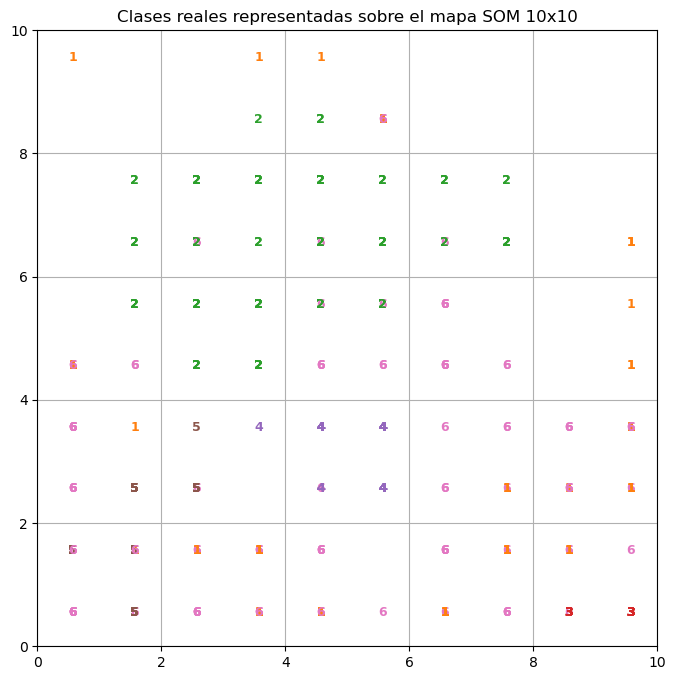

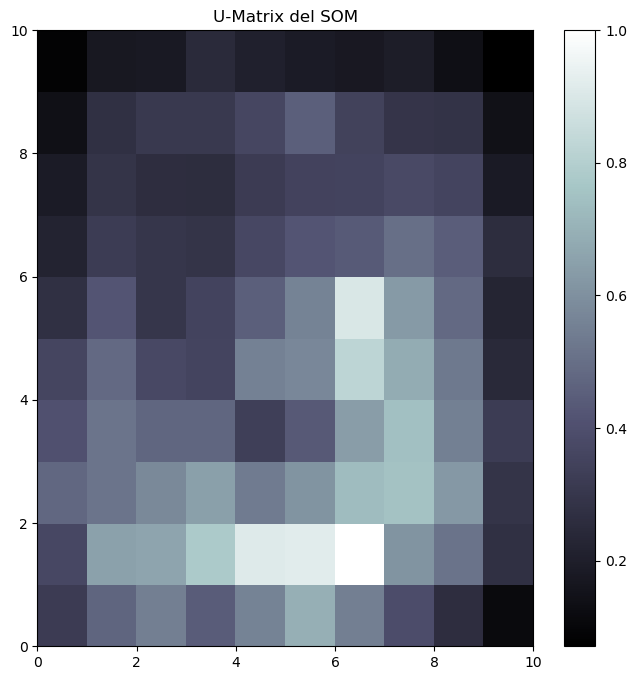

In [59]:
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

# Definición del SOM
som_grid_rows = 10
som_grid_cols = 10
som = MiniSom(x=som_grid_rows, y=som_grid_cols, input_len=X.shape[1], sigma=1.0, learning_rate=0.5,
              neighborhood_function='gaussian', random_seed=42)

# Entrenamiento
som.train(X.values, num_iteration=1000, verbose=False)

# Mapa de clases más representadas
win_map = som.win_map(X.values)
mapped = np.array([som.winner(xi) for xi in X.values])

# Mapa de etiquetas: usamos `y` para colorear las clases reales
plt.figure(figsize=(8, 8))
for i, x in enumerate(X.values):
    w = som.winner(x)
    plt.text(w[0] + 0.5, w[1] + 0.5, str(y.iloc[i]),
             color=plt.cm.tab10(y.iloc[i] % 10),
             fontdict={'weight': 'bold', 'size': 9})

plt.title("Clases reales representadas sobre el mapa SOM 10x10")
plt.xlim([0, som_grid_rows])
plt.ylim([0, som_grid_cols])
plt.grid(True)
plt.show()

# U-Matrix (distancia entre neuronas vecinas)
from pylab import bone, pcolor, colorbar

plt.figure(figsize=(8, 8))
bone()
u_matrix = som.distance_map().T  # Transpuesta para que quede bien alineado
pcolor(u_matrix)
colorbar()
plt.title("U-Matrix del SOM")
plt.show()


### Comentarios SOM

El mapa SOM de 10x10 ha logrado organizar los patrones del conjunto `A2-synthetic.txt` en una estructura bidimensional donde clases como la 2 se agrupan en regiones centrales, mientras que otras, como la 1 y la 3, aparecen en zonas más periféricas. Esta distribución muestra que el modelo ha captado relaciones internas entre los datos, asignando patrones similares a neuronas vecinas y diferenciando algunas clases de forma clara en el mapa.

La U-Matrix refuerza esta observación al mostrar zonas de alta distancia (colores claros) que actúan como fronteras entre grupos, y regiones oscuras que indican homogeneidad. Aunque no todas las clases están perfectamente separadas, el SOM ha revelado una organización topológica útil para análisis exploratorios y para identificar posibles clústeres dentro de los datos.


# DADES REALS

In [60]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
a2real = pd.read_csv('data/A2-real.txt', sep=';')

display(a2real)

# Preparación de datos
X_real = a2real.drop(columns=['Class', 'Location'])
y_real = a2real['Class']
z = a2real['Location']

scaler = StandardScaler()
X_real = scaler.fit_transform(X_real)

,BL,BD,FL,BM,S,Location,Class
0,34.5,18.1,187,2900,1,L2,C1
1,38.8,20.0,190,3950,0,L3,C1
2,45.1,14.5,207,5050,1,L2,C2
3,34.6,21.1,198,4400,0,L1,C1
4,40.6,19.0,199,4000,0,L1,C1
...,...,...,...,...,...,...,...
328,45.0,15.4,220,5050,0,L2,C2
329,43.8,13.9,208,4300,1,L2,C2
330,49.6,16.0,225,5700,0,L2,C2
331,51.5,16.3,230,5500,0,L2,C2


### PCA


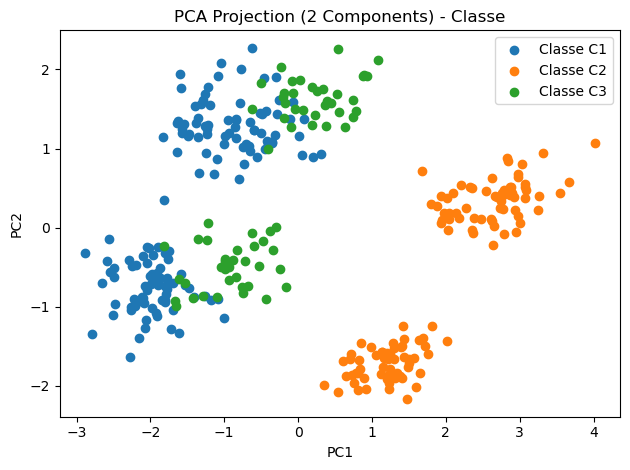

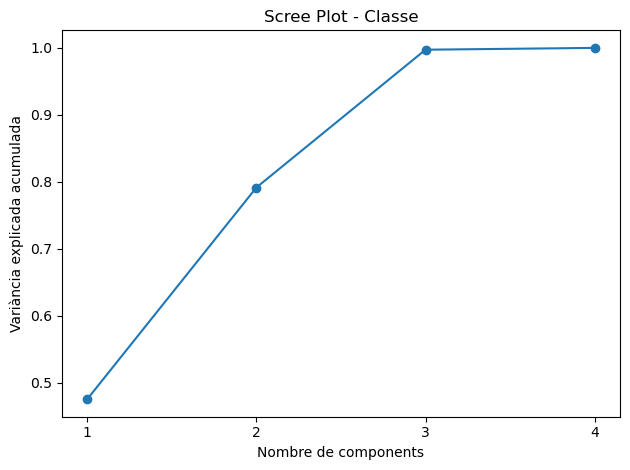

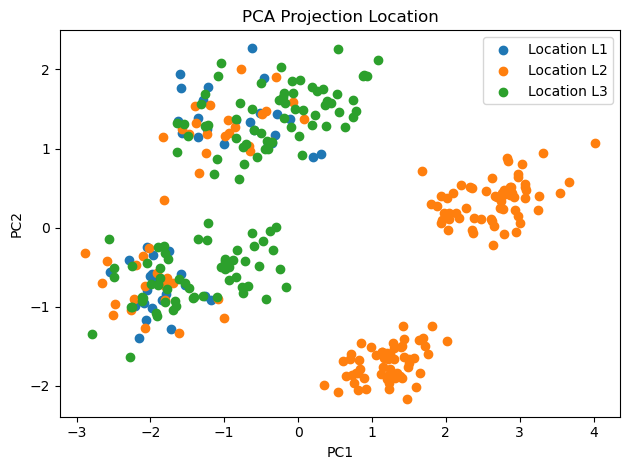

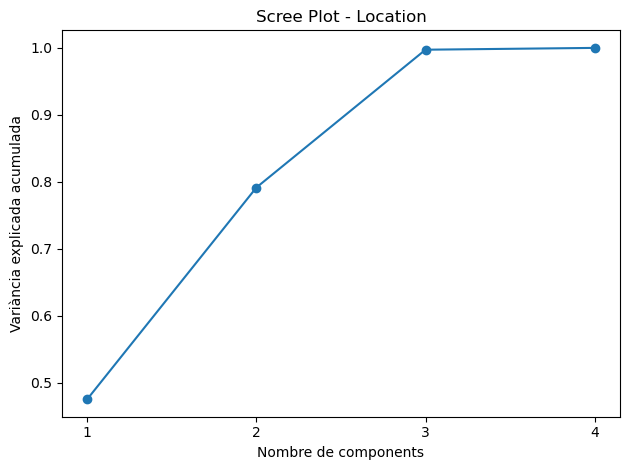

In [61]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# PCA amb les dades originals (sense escalar)
pca2 = PCA(n_components=2)
X_pca = pca2.fit_transform(X_real)

# Projecció en dues dimensions
plt.figure()
for cls in np.unique(y_real):
    mask = (y_real == cls)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f'Classe {cls}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection (2 Components) - Classe')
plt.legend()
plt.tight_layout()
plt.show()

# Scree plot (variància acumulada)
pca_full = PCA().fit(X)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure()
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o')
plt.xlabel('Nombre de components')
plt.ylabel('Variància explicada acumulada')
plt.title('Scree Plot - Classe')
plt.xticks(range(1, len(cum_var)+1))
plt.tight_layout()
plt.show()

# Projecció en dues dimensions
plt.figure()
for cls in np.unique(z):
    mask = (z == cls)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f'Location {cls}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection Location')
plt.legend()
plt.tight_layout()
plt.show()

# Scree plot (variància acumulada)
pca_full = PCA().fit(X)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure()
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o')
plt.xlabel('Nombre de components')
plt.ylabel('Variància explicada acumulada')
plt.title('Scree Plot - Location')
plt.xticks(range(1, len(cum_var)+1))
plt.tight_layout()
plt.show()


### Conclusions sobre dades reals

Veiem que 3 components son suficients per obtenir la gran part de la informació. En la classe és veu les tres classes bé repartides i segmentades, per localització no tant, sembla ser que hi ha una barreja entre la localització L1 i L3. El scree plot ens dius que ens faltaria al menys una dimensió més per poder destingir correctament Location.


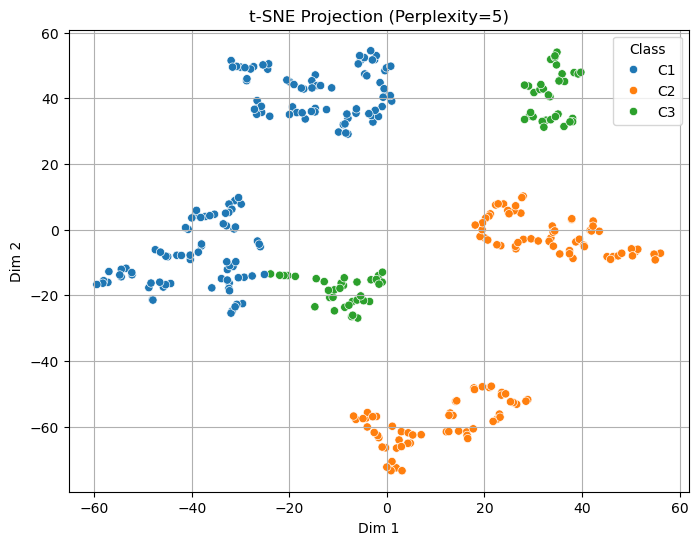

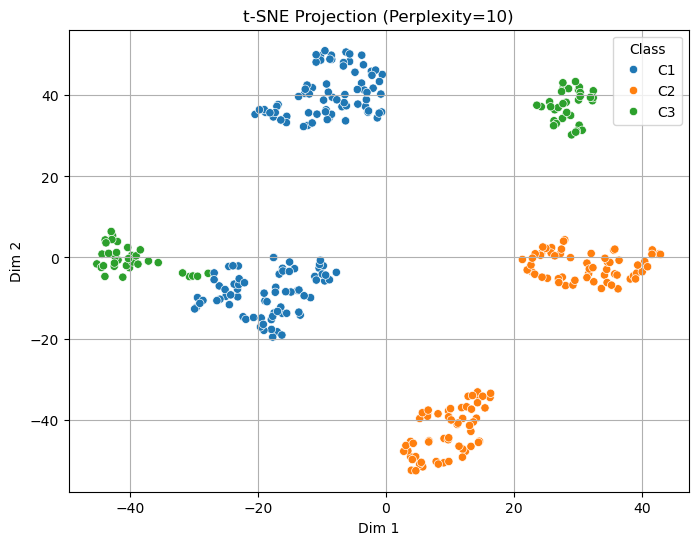

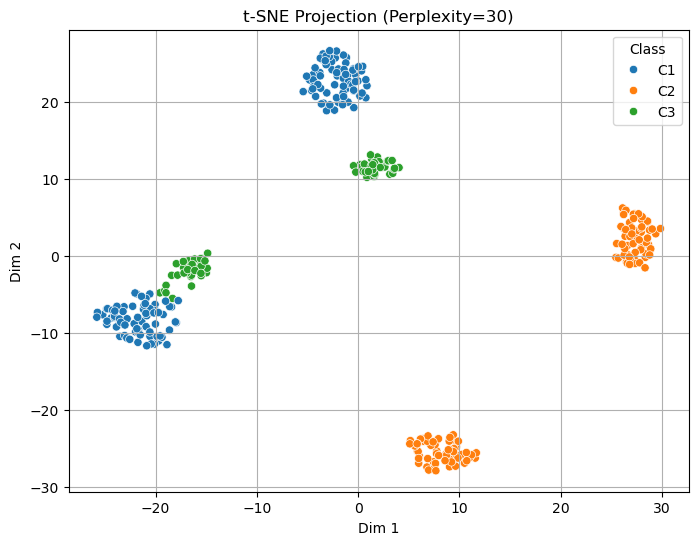

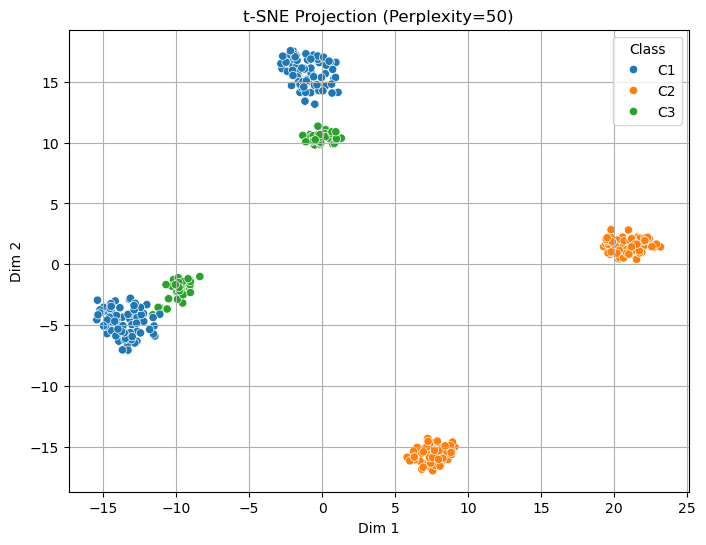

In [62]:
for perplexity in [5, 10, 30, 50 ]:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
    X_tsne_real = tsne.fit_transform(X_real)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_tsne_real[:, 0], y=X_tsne_real[:, 1], hue=y_real, palette='tab10')
    plt.title(f't-SNE Projection (Perplexity={perplexity})')
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')
    plt.legend(title='Class')
    plt.grid(True)
    plt.show()


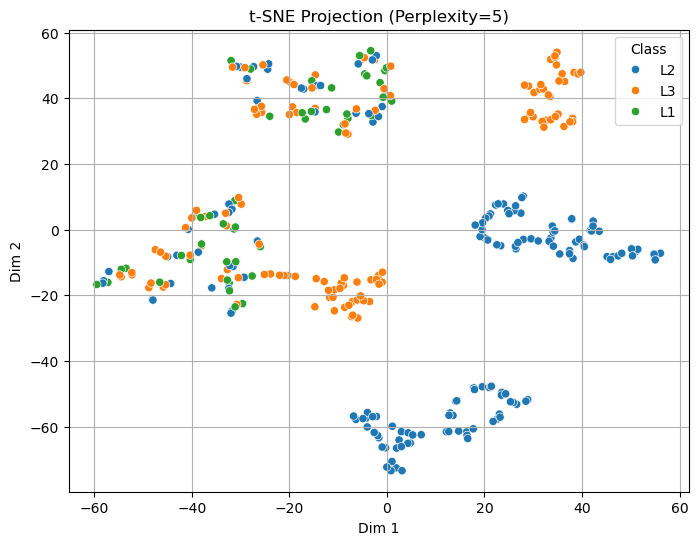

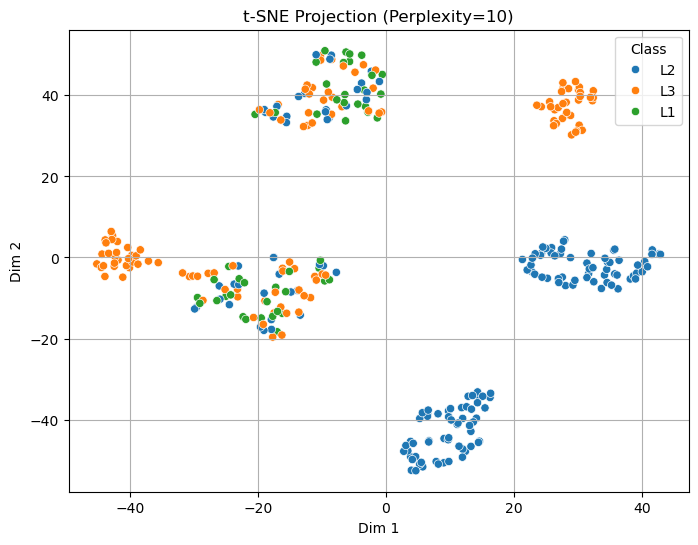

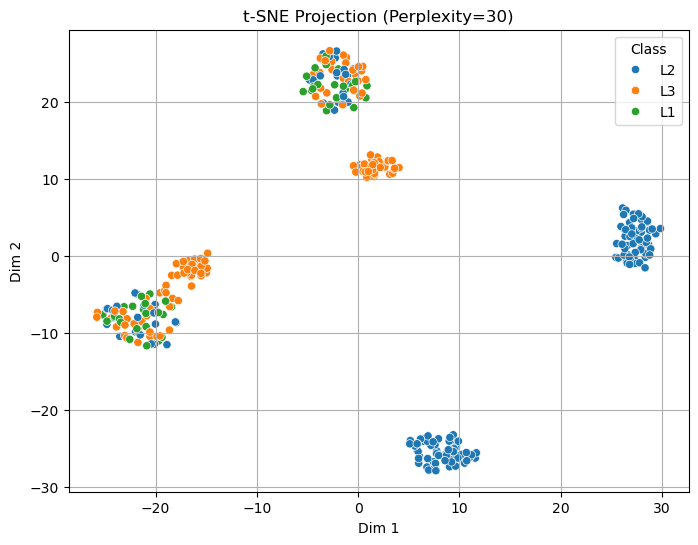

In [63]:
for perplexity in [5, 10, 30]:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
    X_tsne_real = tsne.fit_transform(X_real)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_tsne_real[:, 0], y=X_tsne_real[:, 1], hue=z, palette='tab10')
    plt.title(f't-SNE Projection (Perplexity={perplexity})')
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')
    plt.legend(title='Class')
    plt.grid(True)
    plt.show()


### Comentari sobre T-SNE

A mesura que augmentem la perplexitat només es segmenta la classe C2, les altres dues tendeixen a segmentarse en dos, sembla que hi ha dos subgrups dins de la classe C1 i C3(un cop escalades les dades). En el cas de la localització ens falta variança, no som capaços de trobar la classe L1 segmentada ja que comparteix espai amb les altres dues.

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

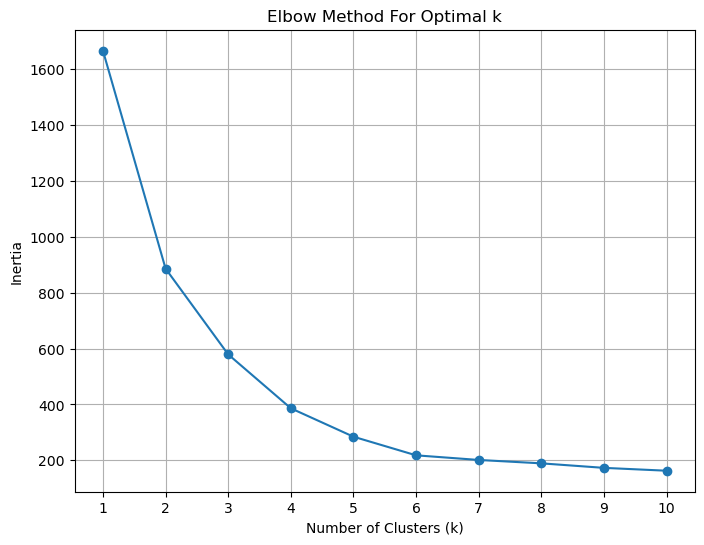

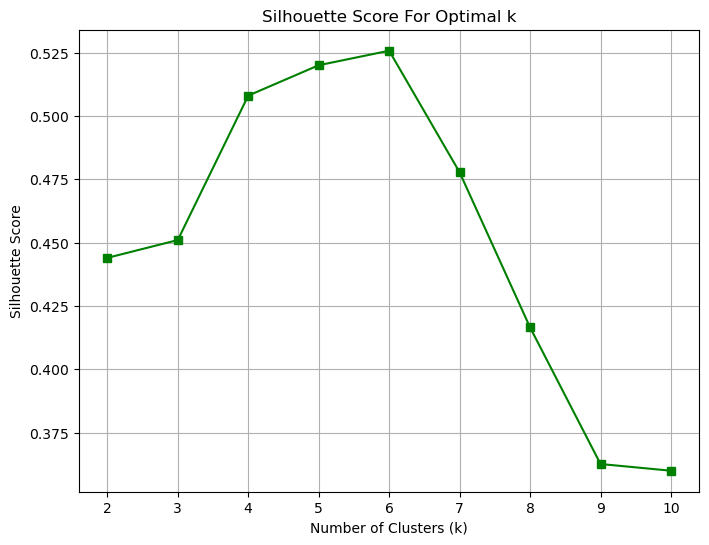

Best k based on Silhouette Score: 6


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


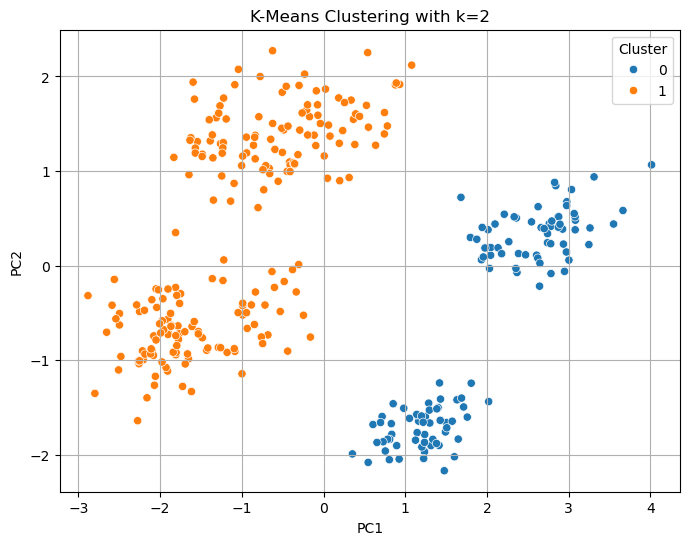

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


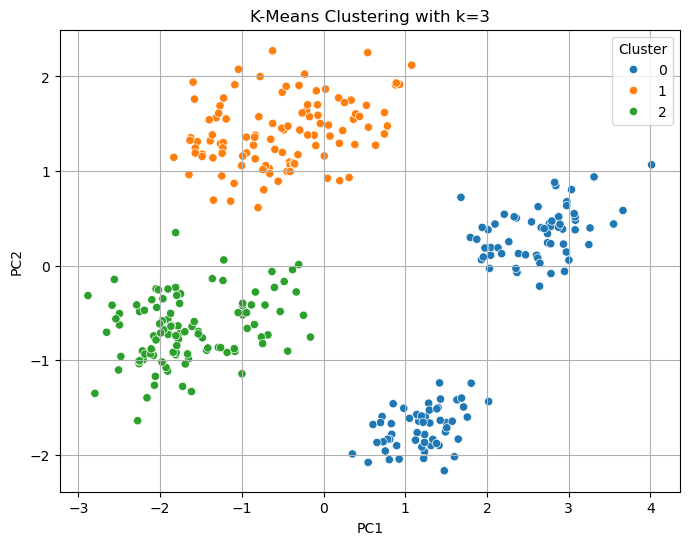

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


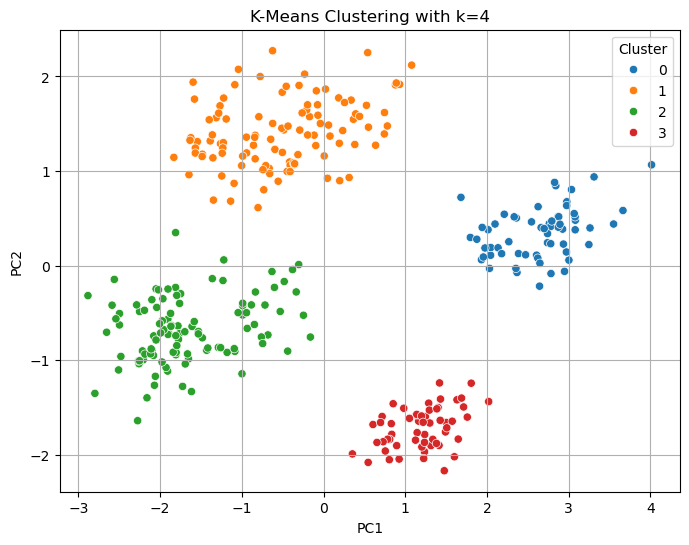

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


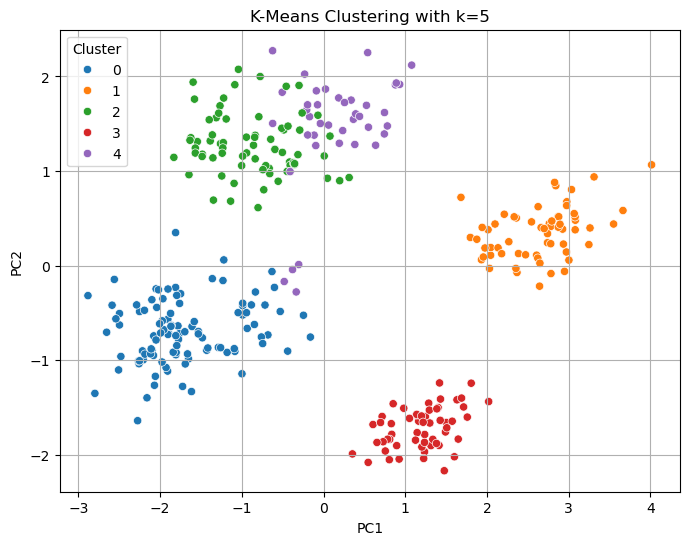

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


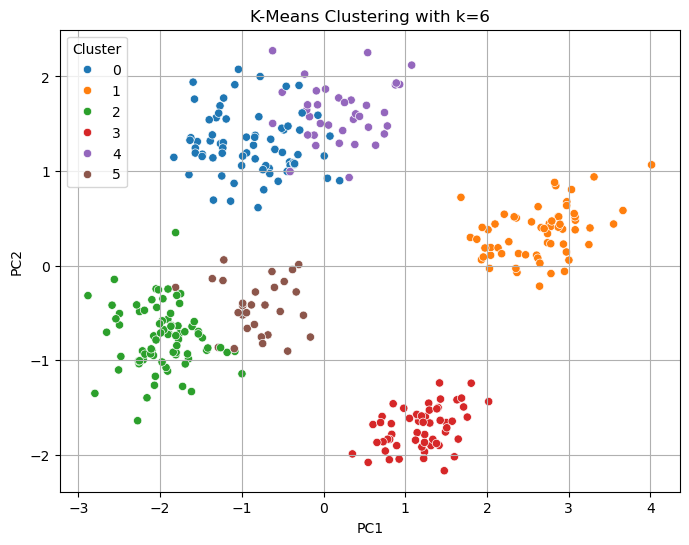

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Assuming X, X_pca, and y are already defined
K = len(np.unique(y))

# Step 1: Elbow and Silhouette Scores
inertias = []
silhouette_scores = []

k_values = range(1, K + 5)  # Start from k=1 for Elbow method

# Elbow method (inertia)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_real)
    inertias.append(kmeans.inertia_)

# Silhouette scores (start from k=2)
silhouette_k_values = range(2, K + 5)
for k in silhouette_k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X_real)
    score = silhouette_score(X_real, cluster_labels)
    silhouette_scores.append(score)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.xticks(k_values)
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(silhouette_k_values, silhouette_scores, marker='s', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.grid(True)
plt.xticks(silhouette_k_values)
plt.show()

# Best silhouette score
best_k = silhouette_k_values[np.argmax(silhouette_scores)]
print(f'Best k based on Silhouette Score: {best_k}')

# Step 2: Clustering and ARI analysis
for k in range(2, K + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(X_real)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='tab10')
    plt.title(f'K-Means Clustering with k={k}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()


### Comentari sobre K-means

Veiem que cada metode ens dona diferents mesures, el elbow point no és evident encara que podem apreciar que podria estar al 5. El metode de la silueta en canvi ens dona molt bona puntuació en el 5 pero sobretot amb k = 6.
 Despres d'aquestes dades, tot sembla que la representació gràfica es veuria bé segmentada amb k = 5 o k= 6, i encara que amb k=6 trobem una bona segmentació, la segmentació més clara la trobem a k=4, tot i que, els clusters són més dispersos. Observant els resultats anterior en altres mesures, sembla ser que el millor valor és k=6.

## AHC

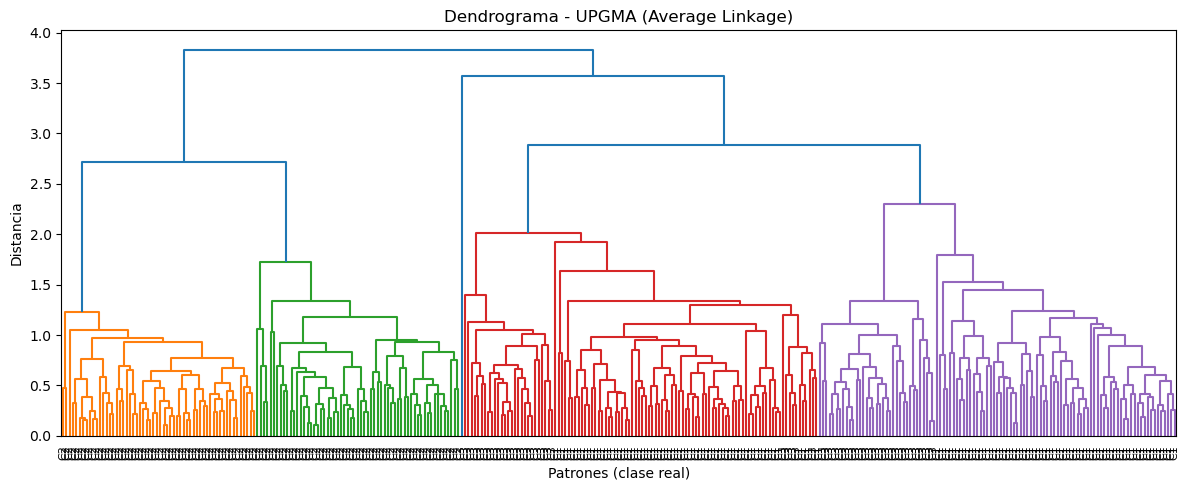

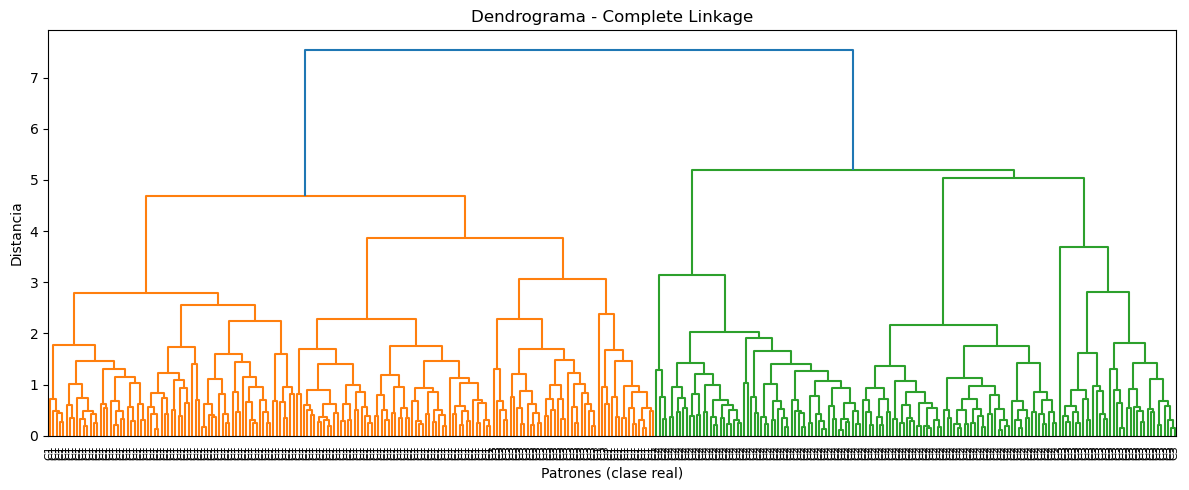

In [65]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# AHC - UPGMA
linkage_avg = linkage(X_real, method='average')
plt.figure(figsize=(12, 5))
plt.title("Dendrograma - UPGMA (Average Linkage)")
dendrogram(linkage_avg, labels=y_real.values, leaf_rotation=90, leaf_font_size=8)
plt.xlabel("Patrones (clase real)")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()

# AHC - Complete Linkage
linkage_complete = linkage(X_real, method='complete')
plt.figure(figsize=(12, 5))
plt.title("Dendrograma - Complete Linkage")
dendrogram(linkage_complete, labels=y_real.values, leaf_rotation=90, leaf_font_size=8)
plt.xlabel("Patrones (clase real)")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()


### Comentarios AHC

El análisis de agrupamiento jerárquico aglomerativo (AHC) sobre el conjunto `A2-real.txt` ha permitido identificar la estructura interna de los datos sin utilizar las clases reales. Se aplicaron dos enfoques: **UPGMA (average linkage)** y **complete linkage**, que ofrecen perspectivas complementarias sobre cómo se agrupan los patrones según su similitud.

El dendrograma de **UPGMA** muestra una estructura más detallada, con múltiples agrupaciones que se forman a distancias relativamente bajas. Esto sugiere que existen subgrupos consistentes dentro del conjunto de datos, lo cual es útil para un análisis exploratorio más fino. Su sensibilidad permite detectar clases o patrones intermedios, revelando una posible subdivisión dentro de las clases originales.

En cambio, el dendrograma de **complete linkage** presenta una organización más compacta y conservadora. Agrupa patrones solo cuando todos los elementos del clúster están cercanos entre sí, generando clústeres más homogéneos y resistentes al ruido. Aunque detecta menos subestructura, proporciona una visión clara de agrupaciones sólidas. En conjunto, ambos métodos ayudan a entender distintas capas de organización en los datos reales.


## Autoencoder

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


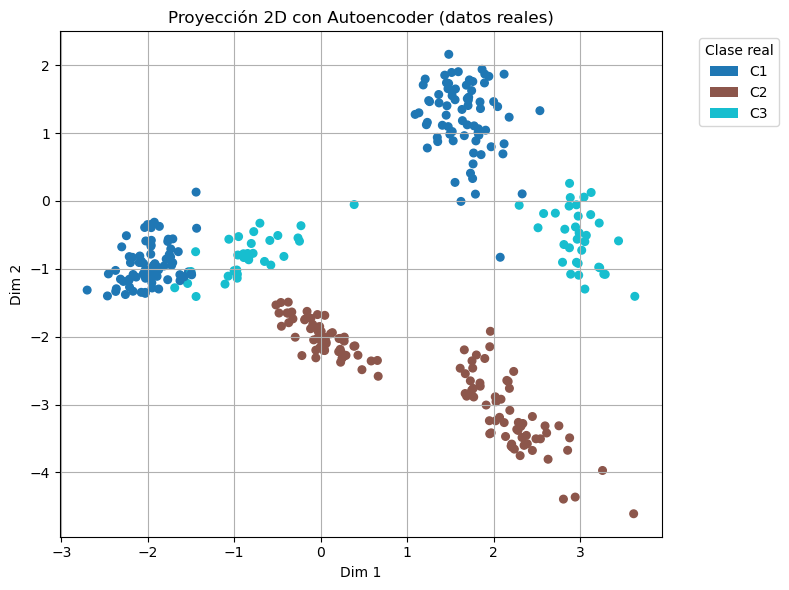

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import pandas as pd

# Arquitectura del Autoencoder
input_dim = X_real.shape[1]  # 5 características
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoded = Dense(8, activation='relu')(input_layer)
bottleneck = Dense(encoding_dim, activation='linear', name='bottleneck')(encoded)
decoded = Dense(8, activation='relu')(bottleneck)
output_layer = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# Entrenamiento
autoencoder.fit(X_real, X_real, epochs=100, batch_size=32, shuffle=True, verbose=0)

# Codificación
encoder = Model(inputs=input_layer, outputs=autoencoder.get_layer('bottleneck').output)
X_encoded_real = encoder.predict(X_real)

# Codificar clases y obtener colores
y_encoded, class_labels = pd.factorize(y_real)
colors = plt.cm.tab10(np.linspace(0, 1, len(class_labels)))

# Visualización con leyenda personalizada
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_encoded_real[:, 0], X_encoded_real[:, 1],
                      c=y_encoded, cmap='tab10', s=30)
plt.title('Proyección 2D con Autoencoder (datos reales)')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.grid(True)

# Leyenda personalizada
legend_elements = [Patch(facecolor=colors[i], label=label)
                   for i, label in enumerate(class_labels)]
plt.legend(handles=legend_elements, title='Clase real', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Comentarios Autoencoder

La proyección 2D generada mediante un autoencoder sobre el conjunto A2-real.txt muestra una separación clara entre las clases C1, C2 y C3, a pesar de no haber usado etiquetas durante el entrenamiento. Las clases se agrupan en regiones diferenciadas del espacio latente, lo que demuestra que el modelo ha captado patrones relevantes en los datos.

La clase C1 (azul oscuro) aparece bien delimitada en la parte superior, C2 (marrón) forma bloques compactos en la parte inferior, y C3 (celeste) ocupa zonas intermedias. Esta distribución refuerza la utilidad del autoencoder como técnica de reducción de dimensionalidad no supervisada.

El modelo utilizado tiene una capa de entrada de 5 neuronas, una codificación con 8 neuronas ReLU, una capa intermedia de 2 neuronas lineales, y una decodificación simétrica. Fue entrenado con Adam, MSE, durante 100 épocas y con un batch size de 32.

## SOM

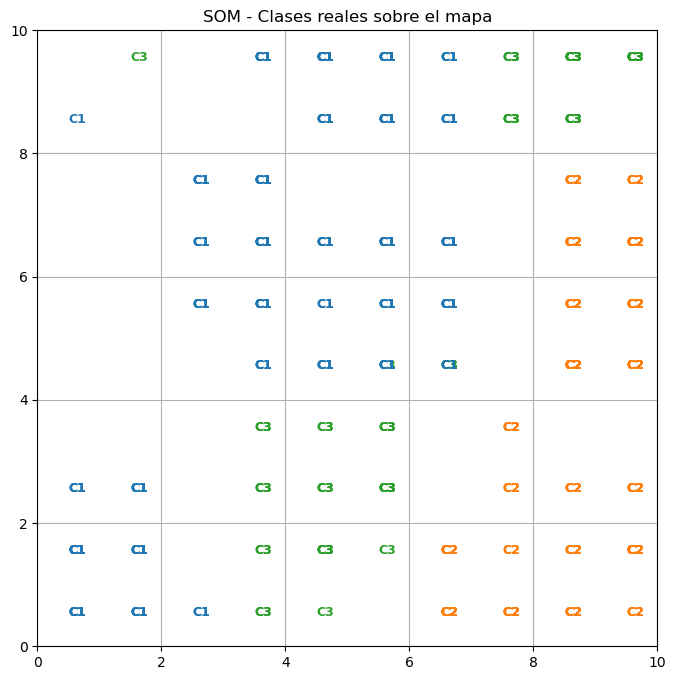

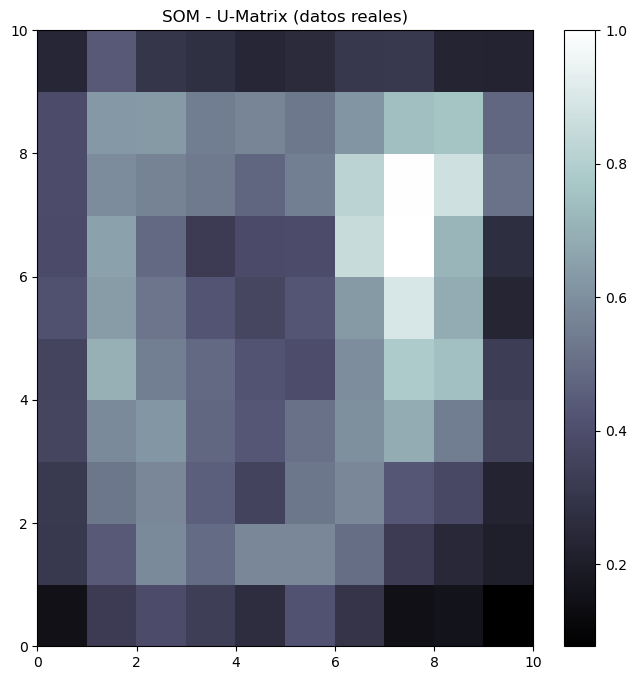

In [67]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Crear y entrenar el SOM
som = MiniSom(x=10, y=10, input_len=X_real.shape[1], sigma=1.0, learning_rate=0.5,
              neighborhood_function='gaussian', random_seed=42)
som.train(X_real, num_iteration=1000, verbose=False)

# Mapa de clases reales
mapped = np.array([som.winner(xi) for xi in X_real])
plt.figure(figsize=(8, 8))
for i, x in enumerate(X_real):
    w = som.winner(x)
    plt.text(w[0] + 0.5, w[1] + 0.5, str(y_real.iloc[i]),
             color=plt.cm.tab10(pd.factorize(y_real)[0][i] % 10),
             fontdict={'weight': 'bold', 'size': 9})
plt.title("SOM - Clases reales sobre el mapa")
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.grid(True)
plt.show()

# U-Matrix
from pylab import bone, pcolor, colorbar
plt.figure(figsize=(8, 8))
bone()
u_matrix = som.distance_map().T
pcolor(u_matrix)
colorbar()
plt.title("SOM - U-Matrix (datos reales)")
plt.show()


### Comentarios SOM

El mapa autoorganizado (SOM) entrenado sobre los datos reales ha logrado proyectar los patrones en una cuadrícula bidimensional de 10x10 neuronas, organizando los datos según su similitud. En el primer gráfico, se observa que cada clase real (C1, C2, C3) tiende a ocupar regiones bien diferenciadas del mapa. La clase C1 aparece agrupada en la parte izquierda y central del mapa, C2 en la zona derecha, y C3 se concentra en regiones intermedias. Esta distribución sugiere que el SOM ha aprendido a diferenciar correctamente las clases según sus características, sin necesidad de usar etiquetas durante el entrenamiento.

La U-Matrix refuerza esta interpretación mostrando zonas claras entre las regiones ocupadas por diferentes clases. Las zonas con tonos más claros indican mayores distancias entre neuronas, que corresponden a fronteras entre clústeres, mientras que las áreas oscuras representan regiones internas más homogéneas. Específicamente, los bordes entre las áreas dominadas por C2 y las dominadas por C1 o C3 muestran altos valores en la U-Matrix, lo que evidencia una transición brusca entre esas clases.

En conjunto, el SOM ha demostrado ser una herramienta eficaz para visualizar la estructura del conjunto de datos. La organización topológica aprendida permite identificar regiones coherentes con las clases reales, y la U-Matrix proporciona una visión intuitiva de la separación entre grupos. Esta técnica resulta especialmente útil para análisis exploratorio y para detectar agrupaciones naturales en datos sin etiquetar.